In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.util import invert
import json

In [2]:
from google.colab import files

# Upload both files
uploaded = files.upload()


Saving Input_image.jpg to Input_image.jpg


In [3]:
img = cv2.imread('Input_image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

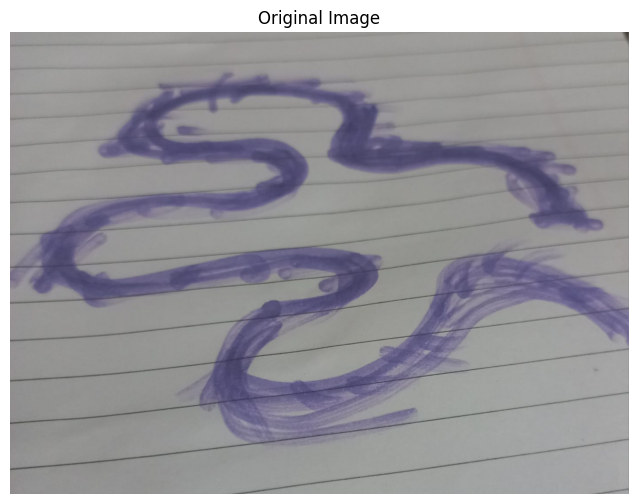

In [4]:
plt.figure(figsize=(8,6))
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

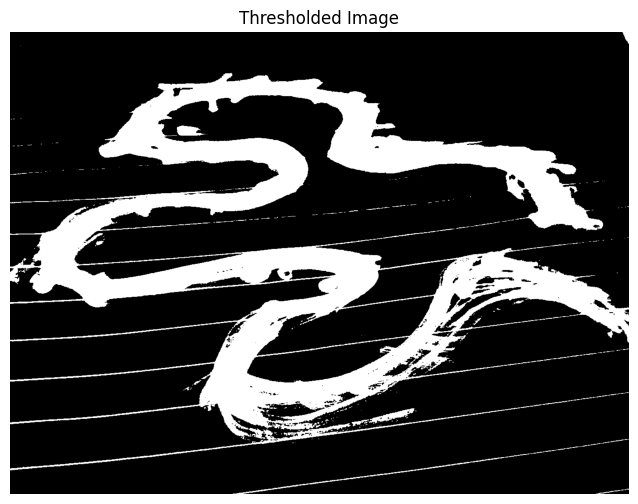

In [6]:
plt.figure(figsize=(8,6))
plt.title('Thresholded Image')
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
edges = cv2.Canny(thresh, 50, 150)

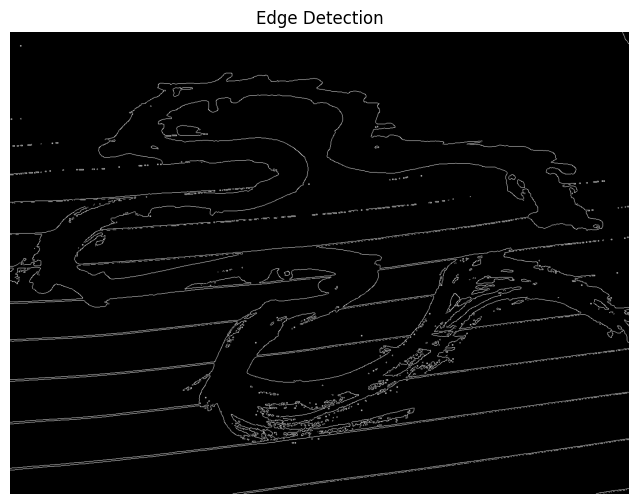

In [8]:
plt.figure(figsize=(8,6))
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 2)

array([[[154, 150, 151],
        [154, 150, 151],
        [154, 150, 151],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[154, 150, 151],
        [154, 150, 151],
        [154, 150, 151],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[154, 150, 151],
        [154, 150, 151],
        [154, 150, 151],
        ...,
        [ 63,  60,  51],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[146, 142, 143],
        [143, 139, 140],
        [143, 139, 140],
        ...,
        [164, 165, 167],
        [164, 165, 167],
        [147, 148, 150]],

       [[145, 141, 142],
        [142, 138, 139],
        [142, 138, 139],
        ...,
        [165, 166, 168],
        [165, 166, 168],
        [147, 148, 150]],

       [[144, 140, 141],
        [141, 137, 138],
        [141, 137, 138],
        ...,
        [165, 166, 168],
        [165, 166, 168],
        [147, 148, 150]]

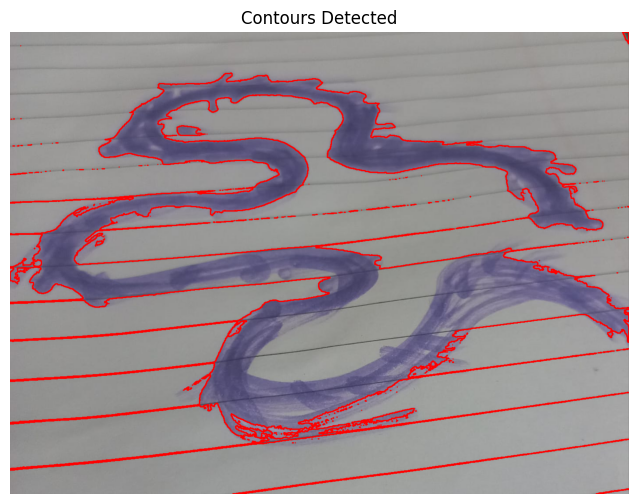

In [10]:
plt.figure(figsize=(8,6))
plt.title('Contours Detected')
plt.imshow(contour_img)
plt.axis('off')
plt.show()

In [11]:
thresh_bool = thresh > 0
skeleton = skeletonize(thresh_bool)
skeleton_img = np.uint8(skeleton)*255

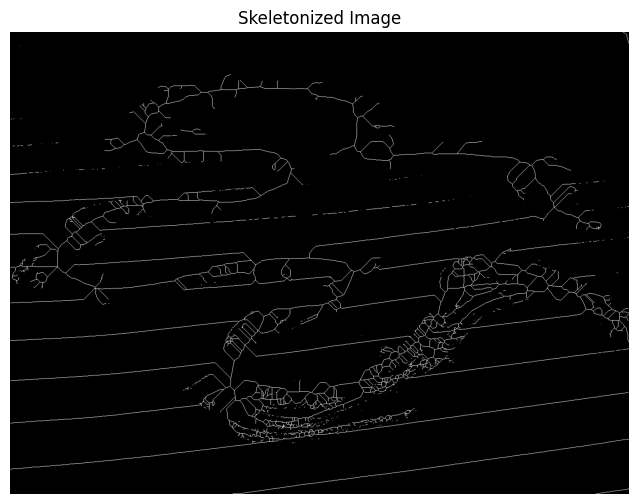

In [12]:
plt.figure(figsize=(8,6))
plt.title('Skeletonized Image')
plt.imshow(skeleton_img, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
overlay = img_rgb.copy()
overlay[skeleton] = [255, 0, 0]

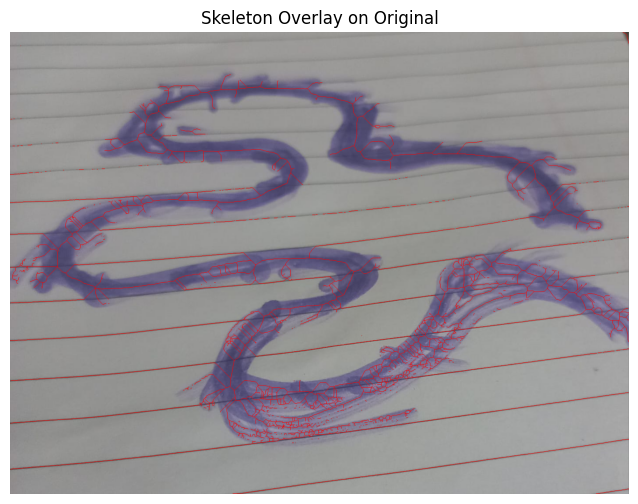

In [14]:
plt.figure(figsize=(8,6))
plt.title('Skeleton Overlay on Original')
plt.imshow(overlay)
plt.axis('off')
plt.show()

In [15]:
paths = []
for cnt in contours:
    path = cnt.squeeze().tolist()  # contour points as list of [x,y]
    paths.append(path)

In [16]:
with open('paths.json', 'w') as f:
    json.dump(paths, f)

In [17]:
print(f"Exported {len(paths)} paths to paths.json")

Exported 242 paths to paths.json
